In [1]:
import os
from IPython.display import display, clear_output
from tqdm import tqdm

import numpy as np
from numpy.typing import NDArray

import matplotlib.pyplot as plt

In [2]:
import classify as kNN_classify

# Prepare - Transfer image textfile to vector data

In [3]:
def img2vector(filename):
    img_vector = np.zeros((1, 1024))
    with open(filename, 'r') as fr:
        for i in range(32):
            line_str = fr.readline()
            for j in range(32):
                img_vector[0, 32*i + j] = int(line_str[j])
    return img_vector

In [4]:
def plot_vector(img_vector:NDArray[1024]):
    img_matrix = img_vector.reshape(32, 32)
    plt.imshow(img_matrix, cmap='gray_r', interpolation='none')
    plt.colorbar()
    plt.show()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. ... 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. ... 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. ... 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. ... 1. 1. 0. 0. 0. 0. 0. 

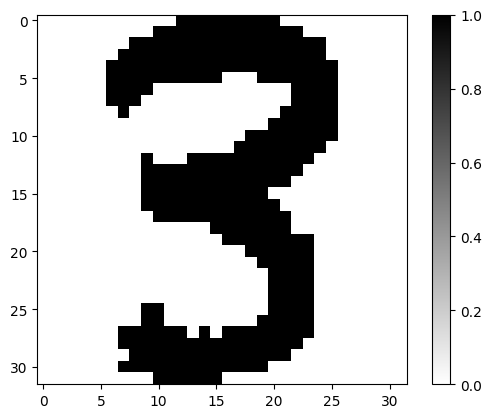

In [5]:
np.set_printoptions(edgeitems=10)   # show more elements
print(img2vector('testDigits/3_12.txt').reshape(32, 32))
np.set_printoptions(edgeitems=3)    # restore to default value

plot_vector(img2vector('testDigits/3_12.txt'))

# Unit Test

In [6]:
hw_features = []

training_file_list = os.listdir('trainingDigits')
training_sample_num = len(training_file_list)
training_matrix = np.zeros((training_sample_num, 1024))

for train_file_no in range(training_sample_num):
    train_file_name = training_file_list[train_file_no]
    train_file_feature = int(train_file_name.split('_')[0])

    hw_features.append(train_file_feature)

    training_matrix[train_file_no,:] = img2vector(
        f'trainingDigits/{train_file_name}'
    )

In [7]:
error_count = np.float64(0)
test_file_list = os.listdir('testDigits')
test_sample_num = len(test_file_list)

progress_bar = tqdm(total=test_sample_num)
for test_file_no in range(test_sample_num):
    test_file_name = test_file_list[test_file_no]
    test_file_feature = int(test_file_name.split('_')[0])

    test_file_data_vector = img2vector(
        f'testDigits/{test_file_name}'
    )

    classifier_result = kNN_classify.classify(
        test_file_data_vector[0], training_matrix, hw_features, 3
    )

    if classifier_result != test_file_feature:
        error_count += 1.0
    
    progress_bar.set_postfix(error=error_count, total=test_sample_num)
    progress_bar.update(1)

error_rate = np.divide(error_count, np.float64(test_sample_num))
acc = np.subtract(np.float64(1), error_rate)

print(f'acc = {100*acc:.2f}%')

100%|██████████| 946/946 [07:05<00:00,  2.22it/s, error=11, total=946]

acc = 98.84%
